## Modelo 1

Se cargan las librerías.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

import seaborn as sns

Se cargan los datos procesados.

In [2]:
segmentos = []

# Leer los archivos CSV segmentados y almacenarlos en la lista
for i in range(0,3):
    segmento = pd.read_csv(f'../data/processed/segmento_{i+1}.csv')
    segmentos.append(segmento)
# Concatenar los DataFrames de los segmentos en uno solo
df1 = pd.concat(segmentos, ignore_index=True)

Se separa el test del Dataframe original no balanceado para asegurar que los datos nuevos serán similares a los reales a predecir, manteniendo proporción en los datos

In [3]:
# Crear las variables para features y target
X = df1[['amt', 'city_pop', 'distancia', 'fraudes_por_Categoria',
       'fraudes_por_estado', 'fraudes_por_edad', 'fraudes_por_hora',
       'fraudes_por_día']]
y = df1['is_fraud']

X_train_full, X_test, y_train_full, y_test= train_test_split(X,
                                                      y, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full, random_state=0)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
# Definir el modelo
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              weighted_metrics=([keras.metrics.Recall(), keras.metrics.Precision()]))

# Crear una función de pérdida ponderada para el problema desbalanceado
class_weights = {0: 0.006, 1: 0.994}  # Ponderar las clases de acuerdo a la proporción de los datos


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model1.fit(X_train, y_train, epochs=50, validation_split=0.2, class_weight = class_weights,
                    validation_data = (X_valid, y_valid), callbacks=early_stopping_cb)

Epoch 1/50
22794/22794 [==============================] - 34s 1ms/step - loss: 0.0030 - recall_9: 0.8778 - precision_8: 0.8928 - val_loss: 0.1424 - val_recall_9: 0.9079 - val_precision_8: 0.0771
Epoch 2/50
22794/22794 [==============================] - 32s 1ms/step - loss: 0.0023 - recall_9: 0.9064 - precision_8: 0.9299 - val_loss: 0.2161 - val_recall_9: 0.9256 - val_precision_8: 0.0699
Epoch 3/50
22794/22794 [==============================] - 34s 1ms/step - loss: 0.0021 - recall_9: 0.9157 - precision_8: 0.9326 - val_loss: 0.2014 - val_recall_9: 0.9356 - val_precision_8: 0.0687
Epoch 4/50
22794/22794 [==============================] - 34s 2ms/step - loss: 0.0022 - recall_9: 0.9147 - precision_8: 0.9340 - val_loss: 0.1575 - val_recall_9: 0.9299 - val_precision_8: 0.0738
Epoch 5/50
22794/22794 [==============================] - 31s 1ms/step - loss: 0.0021 - recall_9: 0.9202 - precision_8: 0.9379 - val_loss: 0.1765 - val_recall_9: 0.9348 - val_precision_8: 0.0756
Epoch 6/50
22794/22794 [=

In [34]:
test = model1.evaluate(X_test, y_test)
print(test)

10131/10131 [==============================] - 9s 885us/step - loss: 0.1639 - recall_9: 0.9140 - precision_8: 0.0931
[0.16393765807151794, 0.9140295386314392, 0.09313198924064636]


In [35]:
pred = model1.predict(X_test)
predictions = np.round(pred)

10131/10131 [==============================] - 8s 738us/step


[[305398  16875]
 [   163   1733]]


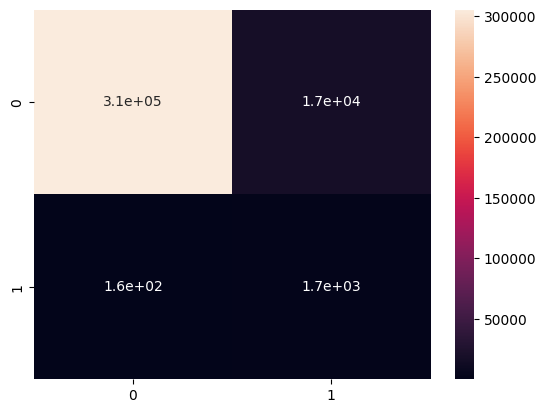

In [36]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [37]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [38]:
precision_score(y_test, predictions)

0.09313198624247636

In [39]:
recall_score(y_test, predictions)

0.9140295358649789

In [40]:
roc_auc_score(y_test, predictions)

0.9308335489039018

In [41]:
# Definir el modelo
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              weighted_metrics=([keras.metrics.Recall(), keras.metrics.Precision()]))

# Crear una función de pérdida ponderada para el problema desbalanceado
class_weights = {0: 0.5, 1: 0.5}  # Ponderar las clases de acuerdo a la proporción de los datos


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model2.fit(X_train, y_train, epochs=50, validation_split=0.2, class_weight = class_weights,
                    validation_data = (X_valid, y_valid), callbacks=early_stopping_cb)

Epoch 1/50
22794/22794 [==============================] - 34s 1ms/step - loss: 0.0084 - recall_10: 0.4162 - precision_9: 0.7517 - val_loss: 0.0150 - val_recall_10: 0.5382 - val_precision_9: 0.7123
Epoch 2/50
22794/22794 [==============================] - 33s 1ms/step - loss: 0.0063 - recall_10: 0.5484 - precision_9: 0.8257 - val_loss: 0.0123 - val_recall_10: 0.6034 - val_precision_9: 0.8091
Epoch 3/50
22794/22794 [==============================] - 32s 1ms/step - loss: 0.0060 - recall_10: 0.5850 - precision_9: 0.8275 - val_loss: 0.0115 - val_recall_10: 0.6239 - val_precision_9: 0.8060
Epoch 4/50
22794/22794 [==============================] - 32s 1ms/step - loss: 0.0059 - recall_10: 0.5965 - precision_9: 0.8305 - val_loss: 0.0120 - val_recall_10: 0.5850 - val_precision_9: 0.8454
Epoch 5/50
22794/22794 [==============================] - 35s 2ms/step - loss: 0.0058 - recall_10: 0.6039 - precision_9: 0.8347 - val_loss: 0.0118 - val_recall_10: 0.5814 - val_precision_9: 0.8624
Epoch 6/50
2279

In [42]:
test = model2.evaluate(X_test, y_test)
print(test)

10131/10131 [==============================] - 9s 847us/step - loss: 0.0113 - recall_10: 0.6092 - precision_9: 0.8431
[0.011316719464957714, 0.6091772317886353, 0.8430656790733337]


In [43]:
pred = model2.predict(X_test)
predictions = np.round(pred)

10131/10131 [==============================] - 7s 700us/step


[[322058    215]
 [   741   1155]]


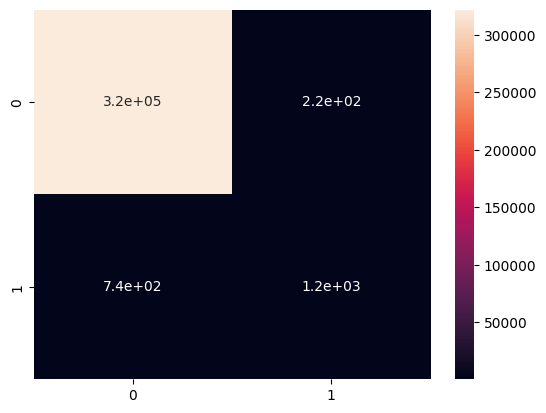

In [44]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [45]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.843065693430657
Recall score: 0.6091772151898734
ROC AUC score: 0.804255039471017


In [8]:
# Definir el modelo
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              weighted_metrics=([keras.metrics.Recall(), keras.metrics.Precision()]))

# Crear una función de pérdida ponderada para el problema desbalanceado
class_weights = {0: 0.25, 1: 0.74}  # Ponderar las clases de acuerdo a la proporción de los datos


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model3.fit(X_train, y_train, epochs=50, validation_split=0.2, class_weight = class_weights,
                    validation_data = (X_valid, y_valid), callbacks=early_stopping_cb)

Epoch 1/50
22794/22794 [==============================] - 31s 1ms/step - loss: 6.9058 - recall_1: 0.1796 - precision: 0.1892 - val_loss: 0.0320 - val_recall_1: 0.1969 - val_precision: 0.3888
Epoch 2/50
22794/22794 [==============================] - 29s 1ms/step - loss: 0.0372 - recall_1: 0.1377 - precision: 0.5348 - val_loss: 0.0328 - val_recall_1: 0.2096 - val_precision: 0.4000
Epoch 3/50
22794/22794 [==============================] - 30s 1ms/step - loss: 0.0315 - recall_1: 0.1489 - precision: 0.5818 - val_loss: 0.0292 - val_recall_1: 0.1771 - val_precision: 0.3693
Epoch 4/50
22794/22794 [==============================] - 32s 1ms/step - loss: 0.0210 - recall_1: 0.1529 - precision: 0.5998 - val_loss: 0.0469 - val_recall_1: 0.3152 - val_precision: 0.2757
Epoch 5/50
22794/22794 [==============================] - 30s 1ms/step - loss: 0.0233 - recall_1: 0.1548 - precision: 0.5933 - val_loss: 0.0286 - val_recall_1: 7.0822e-04 - val_precision: 0.0137
Epoch 6/50
22794/22794 [=================

In [9]:
test = model3.evaluate(X_test, y_test)
print(test)

10131/10131 [==============================] - 8s 741us/step - loss: 0.2270 - recall_1: 0.0823 - precision: 0.2699
[0.22704361379146576, 0.08227848261594772, 0.26989617943763733]


In [10]:
pred = model3.predict(X_test)
predictions = np.round(pred)

10131/10131 [==============================] - 6s 625us/step


[[321851    422]
 [  1740    156]]


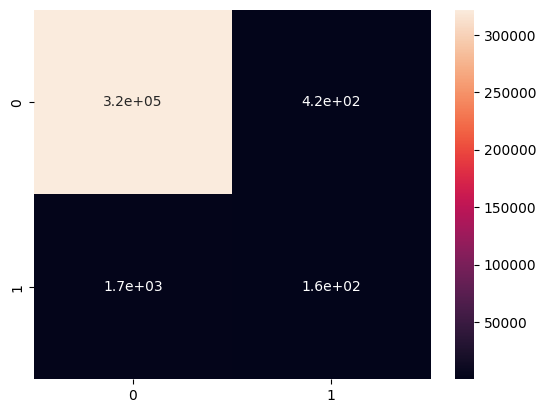

In [11]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [12]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.2698961937716263
Recall score: 0.08227848101265822
ROC AUC score: 0.5404845160956587


In [13]:
model3.save("../models/Model8/trained_model.h5")

In [51]:
# Definir el modelo
model4 = keras.Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model4.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              weighted_metrics=([keras.metrics.Recall(), keras.metrics.Precision()]))

# Crear una función de pérdida ponderada para el problema desbalanceado
class_weights = {0: 0.5, 1: 0.5}  # Ponderar las clases de acuerdo a la proporción de los datos


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model4.fit(X_train, y_train, epochs=50, validation_split=0.2, class_weight = class_weights,
                    validation_data = (X_valid, y_valid), callbacks=early_stopping_cb)

Epoch 1/50
22794/22794 [==============================] - 42s 2ms/step - loss: 0.0107 - recall_12: 0.2437 - precision_11: 0.7084 - val_loss: 0.0185 - val_recall_12: 0.3732 - val_precision_11: 0.7360
Epoch 2/50
22794/22794 [==============================] - 40s 2ms/step - loss: 0.0094 - recall_12: 0.3013 - precision_11: 0.7135 - val_loss: 0.0175 - val_recall_12: 0.4008 - val_precision_11: 0.7408
Epoch 3/50
22794/22794 [==============================] - 40s 2ms/step - loss: 0.0092 - recall_12: 0.3299 - precision_11: 0.7135 - val_loss: 0.0172 - val_recall_12: 0.3754 - val_precision_11: 0.7875
Epoch 4/50
22794/22794 [==============================] - 40s 2ms/step - loss: 0.0090 - recall_12: 0.3573 - precision_11: 0.7335 - val_loss: 0.0170 - val_recall_12: 0.4695 - val_precision_11: 0.7278
Epoch 5/50
22794/22794 [==============================] - 42s 2ms/step - loss: 0.0089 - recall_12: 0.3754 - precision_11: 0.7344 - val_loss: 0.0168 - val_recall_12: 0.3222 - val_precision_11: 0.8183
Epoch

In [61]:
test = model4.evaluate(X_test, y_test)
print(test)

10131/10131 [==============================] - 10s 976us/step - loss: 0.0158 - recall_12: 0.4293 - precision_11: 0.7872
[0.015778658911585808, 0.4293248951435089, 0.7872340679168701]


In [62]:
pred = model4.predict(X_test)
predictions = np.round(pred)

10131/10131 [==============================] - 8s 751us/step


[[322053    220]
 [  1082    814]]


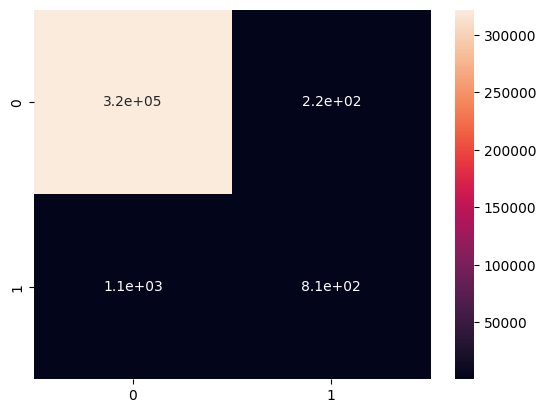

In [63]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [64]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.7872340425531915
Recall score: 0.4293248945147679
ROC AUC score: 0.7143211217352333


In [56]:
# Definir el modelo
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model5.compile(optimizer=keras.optimizers.AdamW(weight_decay=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              weighted_metrics=([keras.metrics.Recall(), keras.metrics.Precision()]))

# Crear una función de pérdida ponderada para el problema desbalanceado
class_weights = {0: 0.5, 1: 0.5}  # Ponderar las clases de acuerdo a la proporción de los datos


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model5.fit(X_train, y_train, epochs=50, validation_split=0.2, class_weight = class_weights,
                    validation_data = (X_valid, y_valid), callbacks=early_stopping_cb)

Epoch 1/50
22794/22794 [==============================] - 43s 2ms/step - loss: 0.0118 - recall_13: 0.1841 - precision_12: 0.6184 - val_loss: 0.0189 - val_recall_13: 0.2514 - val_precision_12: 0.8659
Epoch 2/50
22794/22794 [==============================] - 41s 2ms/step - loss: 0.0097 - recall_13: 0.3013 - precision_12: 0.7083 - val_loss: 0.0188 - val_recall_13: 0.2904 - val_precision_12: 0.8471
Epoch 3/50
22794/22794 [==============================] - 41s 2ms/step - loss: 0.0095 - recall_13: 0.3194 - precision_12: 0.7039 - val_loss: 0.0168 - val_recall_13: 0.2762 - val_precision_12: 0.8442
Epoch 4/50
22794/22794 [==============================] - 42s 2ms/step - loss: 0.0095 - recall_13: 0.3013 - precision_12: 0.6842 - val_loss: 0.0165 - val_recall_13: 0.4717 - val_precision_12: 0.7271
Epoch 5/50
22794/22794 [==============================] - 42s 2ms/step - loss: 0.0094 - recall_13: 0.3078 - precision_12: 0.6869 - val_loss: 0.0164 - val_recall_13: 0.4773 - val_precision_12: 0.7382
Epoch

In [57]:
test = model5.evaluate(X_test, y_test)
print(test)

10131/10131 [==============================] - 8s 831us/step - loss: 0.0164 - recall_13: 0.3344 - precision_12: 0.8076
[0.016415225341916084, 0.33438819646835327, 0.8076432943344116]


In [58]:
pred = model5.predict(X_test)
predictions = np.round(pred)

10131/10131 [==============================] - 7s 689us/step


[[322053    220]
 [  1082    814]]
Precision score: 0.7872340425531915
Recall score: 0.4293248945147679
ROC AUC score: 0.7143211217352333


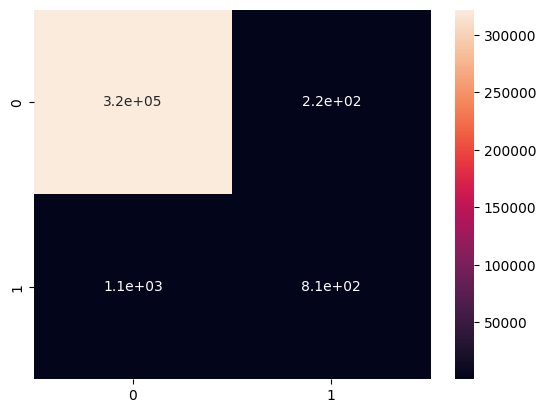

In [65]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))